Website Traffic Forecasting

Este código é um exercício pessoal com o objetivo de prever o tráfego de rede de um determinado site. A inspiração para este exercício está nas referências abaixo. 

A ideia geral, conforme já descrito, é prever e analisar o tráfego de rede do site. Para isso, faremos uso do modelo Arima, que consta na biblioteca statsmodels.

Referências:

https://thecleverprogrammer.com/2022/06/28/website-traffic-forecasting-using-python/
https://www.youtube.com/watch?v=1VwHG6ceuz4
http://sillasgonzaga.com/material/curso_series_temporais/arima.html#modelos-arima

Bibliotecas utilizadas:
- Pandas;
- Matplotlib;
- Plotly;
- Statsmodels.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [10]:
data = pd.read_csv(r"C:\Users\jpedr\Codigos\Projeto 120\WebTraffic\data.csv", sep = ',')
print(data.head())


        Date,Views
0  01/06/2021,7831
1  02/06/2021,7798
2  03/06/2021,7401
3  04/06/2021,7054
4  05/06/2021,7973


In [14]:
data[['Date', 'Views']] = data['Date,Views'].str.split(',', expand=True)

In [16]:
df = data[['Date', 'Views']]

In [18]:
df["Date"] = pd.to_datetime(df["Date"], 
                              format="%d/%m/%Y")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 6.2+ KB
None


C:\Users\jpedr\AppData\Local\Temp\ipykernel_11160\2994463705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"],


In [29]:
df['Views'] = pd.to_numeric(df['Views'])

C:\Users\jpedr\AppData\Local\Temp\ipykernel_11160\3365441208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Views'] = pd.to_numeric(df['Views'])


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB


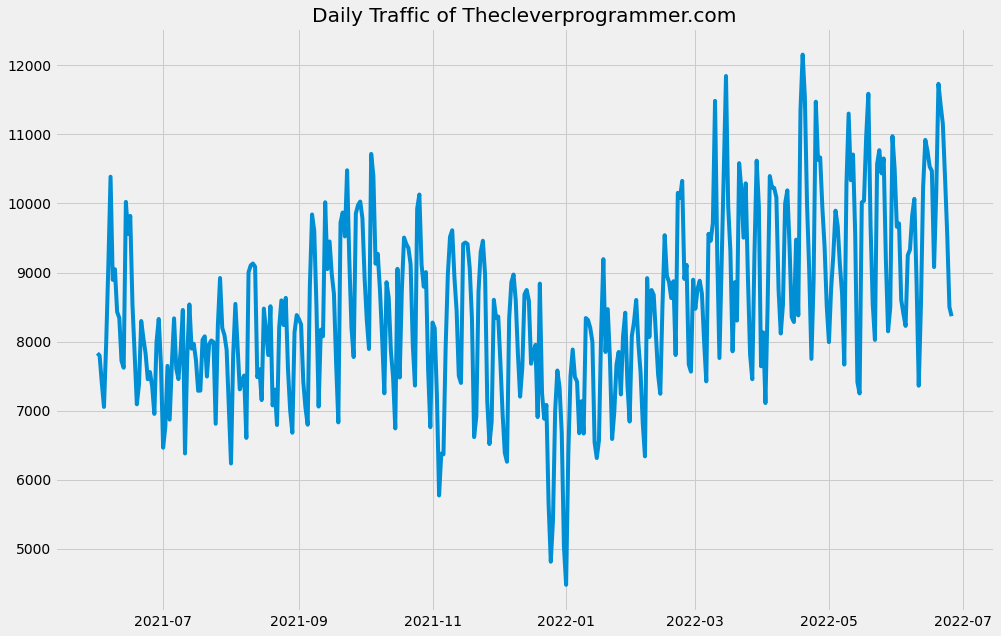

In [31]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot("Date", "Views", data = df)
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

A combinação entre os métodos de diferenciação e os modelos de autoregressão e média móvel resultam em um modelo ARIMA (AutoRegressive Integrated Moving Average model) não-sazonal. Arima é um algoritmo utilizado para prever dados de séries temporais. Os modelos ARIMA possuem três parâmetros, que podem ser definidos assim:

p:  é o número de valores (lagged values) que precisam ser adicionados ou subtraídos dos valores. Ele captura a ordem do modelo autoregressivo;

d:  representa o número de vezes que os dados precisam ser diferenciados para produzirem um sinal estacionário. Se os 
dados forem estacionários, o valor deverá ser 0, e se for um dado sazonal, o valor de d deverá ser 1;

q:   É o número de lagged values para o erro adicionados ou subtraídos dos valore reais. Ele captura a média móvel do Modelo Arima.

<Figure size 432x288 with 0 Axes>

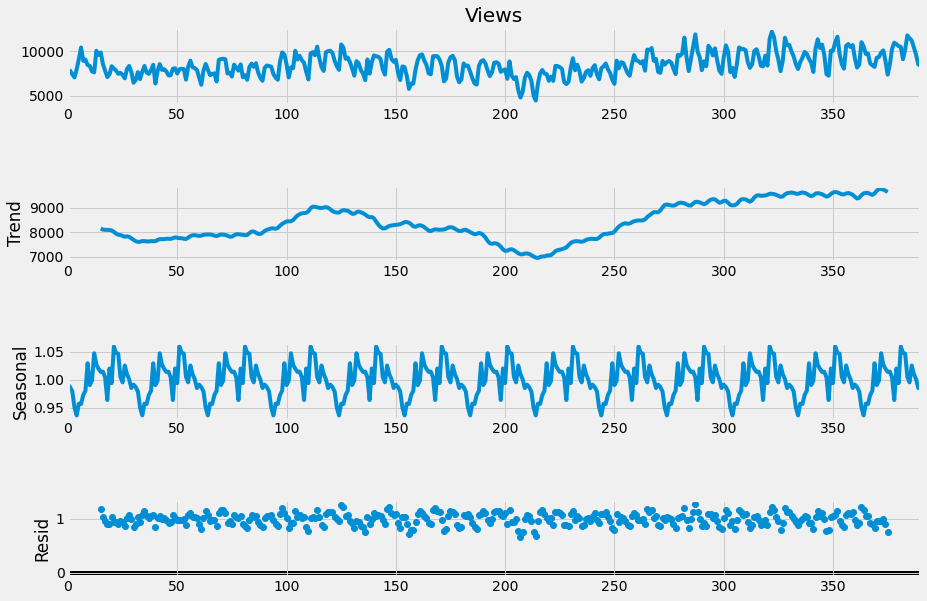

In [34]:
result = seasonal_decompose(df["Views"], 
                            model='multiplicative', 
                            period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

O gráfico acima deixa bem claro que a série temporal é sazonal, então, portanto, d será igual a 1.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

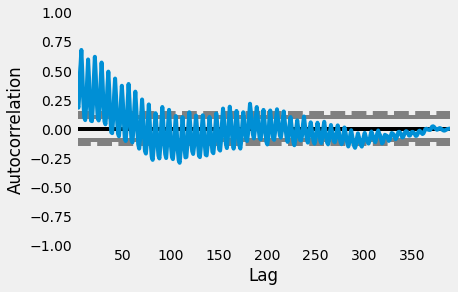

In [35]:
pd.plotting.autocorrelation_plot(df["Views"])

No gráfico de autocorrelação acima, podemos observar que a curva começa a ter um movimento diferente da tendência inicial a partir 5º traço na primeira linha. Portanto, p será igual a 5.

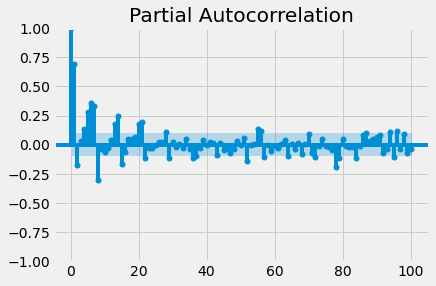

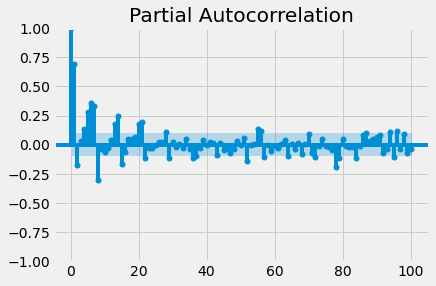

In [38]:
plot_pacf(df["Views"], lags = 100)

No gráfico acima, podemos observar que apenas dois valores se demonstraram bem acima dos outros valores. Portanto, q será igual a 2.

In [41]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(df['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\jpedr\anaconda3\envs\proj_120\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\jpedr\anaconda3\envs\proj_120\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.430
Date:                            Mon, 01 Aug 2022   AIC                           6228.861
Time:                                    21:32:40   BIC                           6287.884
Sample:                                         0   HQIC                          6252.286
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7804      0.134      5.822      0.000       0.518       1.043
ar.L2         -0.7983      0.135   

In [42]:
predictions = model.predict(len(data), len(data)+50)
print(predictions)

391     9875.220680
392    10789.302685
393    10758.239498
394     9862.450733
395     8765.353123
396     8213.808678
397     8930.630067
398     9687.038795
399    10271.989355
400    10625.214057
401     9851.734571
402     9361.335242
403     9041.482746
404     9083.653567
405    10540.869658
406    11003.954216
407    10894.812630
408    10080.088694
409     9445.173759
410     8631.266631
411     9185.897537
412    10395.390712
413    10593.970262
414    10786.509637
415    10261.471734
416     9450.066955
417     9044.345995
418     9172.749915
419     9890.454916
420    10220.105792
421    10714.034041
422     9897.223470
423     9542.275821
424     9069.459985
425     8827.774510
426    10139.317284
427    10839.346306
428    10903.461367
429    10409.129479
430     9450.658010
431     8699.485325
432     8727.729379
433    10062.427093
434    10505.317980
435    10839.170405
436    10483.145354
437     9334.518369
438     9177.729230
439     9360.739382
440    10298.420020


<AxesSubplot:>

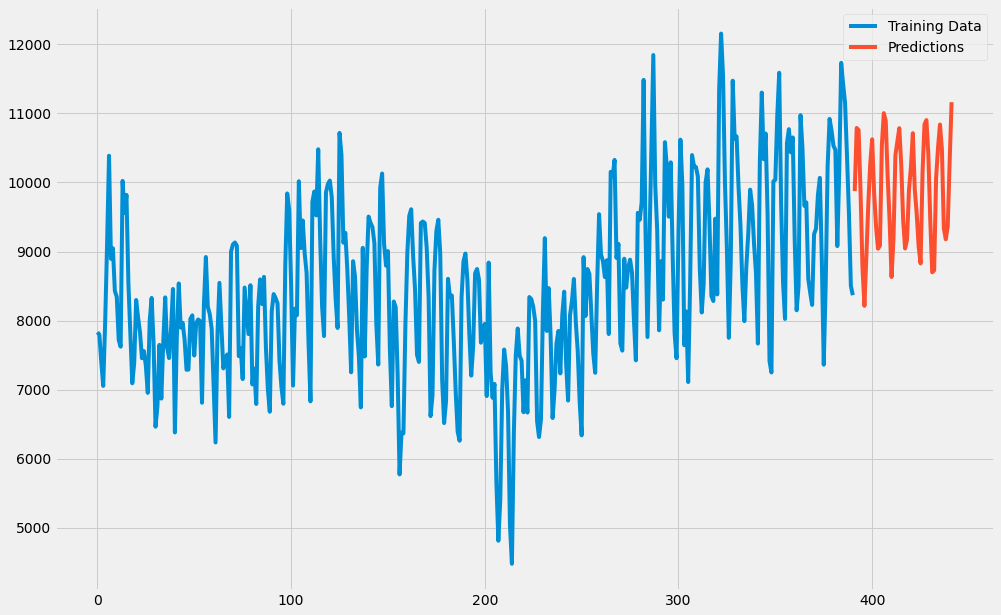

In [43]:
df["Views"].plot(legend=True, label="Training Data", 
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")